In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

import sys
sys.path.append('../utils')

from db_operations import get_data

In [2]:
df = get_data()

Succesfully connected to the database
Data fetched successfully


In [3]:
df.head()

,ID,GDP_per_capita,Health_Life_Expectancy,Freedom,Generosity,Government_Corruption,Continent_Africa,Continent_America,Continent_Asia,Continent_Europe,Continent_Oceania,Happiness_Score,Predicted_Happiness_Score
0,1,0.816,0.666,0.260,0.077,0.028,0,0,1,0,0,4.321,4.88164
1,2,0.314,0.254,0.312,0.175,0.128,1,0,0,0,0,4.424,4.03522
2,3,1.188,0.884,0.562,0.055,0.017,0,0,0,1,0,5.410,5.90153
3,4,1.300,0.999,0.564,0.375,0.151,0,0,0,1,0,6.726,6.97998
4,5,1.233,0.854,0.543,0.064,0.034,0,0,0,1,0,6.711,6.07577


In [4]:
y_test = df['Happiness_Score']
y_pred = df['Predicted_Happiness_Score']

**Coefficient of determination (R²)**

In [5]:
r2_rf = r2_score(y_test, y_pred)

print("Random Forest Regression Model Results:")
print("Coefficient of determination (R^2):", r2_rf)

Random Forest Regression Model Results:
Coefficient of determination (R^2): 0.8312861508491083


As we can see,  the model presents a rather high coefficient of determination, this means, that 83% of the variability in the Happiness Score is explained by the model. This means

**Mean Squared Error**

In [6]:
mse_rf = mean_squared_error(y_test, y_pred)

print("Random Forest Regression Model Results:")
print("Mean Squared Error (MSE):", mse_rf)

Random Forest Regression Model Results:
Mean Squared Error (MSE): 0.21138023200128203


A MSE of 0.2116 indicates that, on average, the model predictions differ from the actual value by 0.2116 squared units.
A lower MSE means that the model has less squared error, implying that it is closer to accurately predicting the actual values. So, an MSE of 0.2116 suggests that the model is relatively close to accurate predictions.

**Mean Absolute Error**

In [7]:
mae_rf = mean_absolute_error(y_test, y_pred)

print("Random Forest Regression Model Results:")
print("Mean Squared Error (MAE):", mae_rf)

Random Forest Regression Model Results:
Mean Squared Error (MAE): 0.32970329059829057


A MAE of 0.3289 shows that, on average, the predictions deviate from the actual value by 0.3289 units. 
The MAE is the measure of the average of the absolute differences between model predictions and actual values. This metric is less sensitive to extreme values compared to the MSE, as it does not square the errors.

##### We can see that the MAE is larger than the MSE, this could mean that there are some predictions that are significantly far from the true value (larger errors) and contribute to a larger MAE, however, in general, most of the predictions are quite accurate and have smaller deviations, which reduces the MSE.

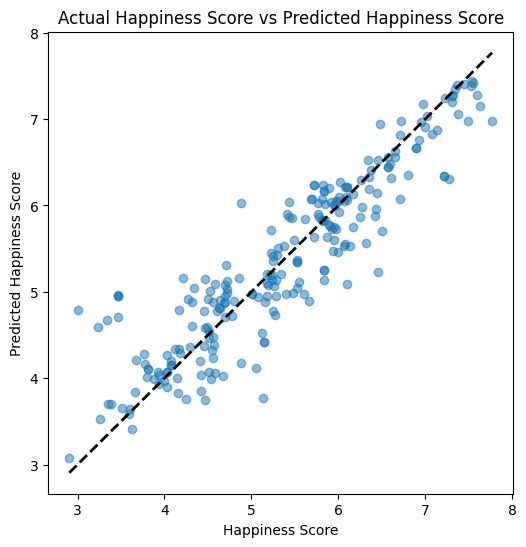

In [8]:
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Happiness Score")
plt.ylabel("Predicted Happiness Score")
plt.title("Actual Happiness Score vs Predicted Happiness Score")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  #tto graph the black dashed line

plt.show()